In [1]:
from spai.storage import Storage

# retrieve all images
storage = Storage("../../data")
images = storage.list("NDVI*")
print("Found the following images:", images)

Found the following images: ['NDVI_2023-06-24.tif', 'NDVI_2023-06-26.tif', 'NDVI_2023-07-06.tif', 'NDVI_2023-07-09.tif']


In [2]:
import numpy as np

# categorize ndvis

def categorize(data, cats=[-100, 0.1, 0.3, 0.5, 100]):
    data0 = data.copy()
    for i, cat in enumerate(cats[:-1]):
        data0[(data > cat) & (data <= cats[i+1])] = i
    data0 = data0.astype(np.uint8)
    return data0
       
for image in images:
    ds = storage.read(image)
    data = ds.read(1)
    cats = categorize(data)
    date = image.split("_")[1].split(".")[0]
    storage.create(cats, f"cat_NDVI_{date}.tif", ds=ds)

/tmp/ipykernel_2073021/1001514507.py:9: RuntimeWarning: invalid value encountered in cast
  data0 = data0.astype(np.uint8)


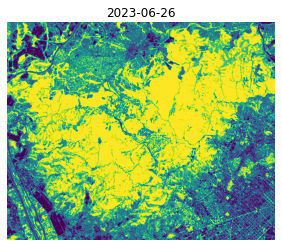

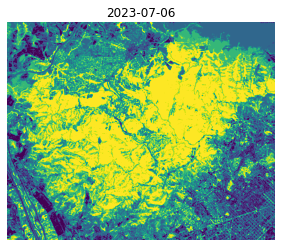

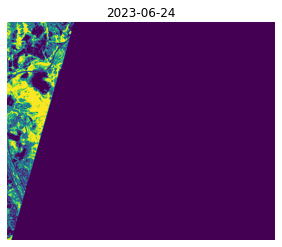

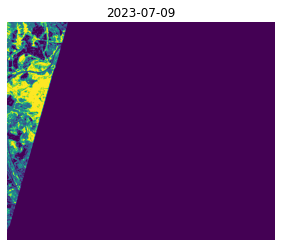

In [3]:
import matplotlib.pyplot as plt

# visualize categorized ndvis

images = storage.list("cat_NDVI*")
for image in images:
    ds = storage.read(image)
    cats = ds.read(1)
    date = image.split("_")[2].split(".")[0]
    plt.imshow(cats)
    plt.title(date)
    plt.axis("off")
    plt.show()


In [4]:
import pandas as pd

# compute statistics

stats = []
mppx = 10 * 10  # meters per pixel
hasppx = mppx / 10000  # hectares per square meter
for image in images:
    ds = storage.read(image)
    data = ds.read(1)
    counts = np.bincount(data.flatten())
    has = counts * hasppx
    stats.append(has)

dates = [image.split("_")[2].split(".")[0] for image in images]
df = pd.DataFrame(stats, columns=['bare ground', 'low', 'medium', 'high'], index=dates)
df.index = pd.to_datetime(df.index)
df = df.sort_index()
df

,bare ground,low,medium,high
2023-06-24,14091.79,607.22,419.30,549.61
2023-06-26,1727.92,3833.57,3454.43,6652.00
2023-07-06,1592.43,4429.35,3976.39,5669.75
2023-07-09,14312.59,521.96,365.35,468.02


In [5]:
# save statistics

storage.create(df, "stats.csv")

'../../data/stats.csv'

In [6]:
df = storage.read("stats.csv")
df

,bare ground,low,medium,high
2023-06-24,14091.79,607.22,419.30,549.61
2023-06-26,1727.92,3833.57,3454.43,6652.00
2023-07-06,1592.43,4429.35,3976.39,5669.75
2023-07-09,14312.59,521.96,365.35,468.02
